# October 18

We do things go?

Last time, we stripped the specimen names from a Nexus-formatted data file, and searched them in GBIF. We then queried a global atlas to find latitude and longitude coordinates for the specimens. Now, we are ready to map them. 

There are many ways to interact with maps in Python. On the more complex end is Geographic Information Systems (GIS). This could probably be a whole course, and that's not really our scope here. We will use `basemap` to leverage `MatplotLib` to make our maps. `Basemap` takes advantage of the plotting software we have already learned to create new kinds of visualizations.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


Much like the other plots we worked with, we start with a canvas in `Basemap`. In the below code, we will begin with the following DPI and dimensions.

In [ ]:
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 

In [ ]:
df = pd.read_csv('../data_output/dropped_zeroes.csv')


In [ ]:
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'green')
map.drawmapboundary()


# Exercise 1: 
We will need to process our data such that:

- The coordinates column is split into two columns called "lat" and "long" (Hint: see the Sept. 11 notebook)
- The parentheses are removed from the resulting columns. 
- The columns contain floats

In [8]:
#Answer follows

    #Bullet one
df[['lat', 'long']] = df.coords.str.split(',', 2, expand=True)
    #Bullet two
df['lat'] = df.lat.replace(to_replace = "\(", value = "", regex = True)
df['long'] = df.long.replace(to_replace = "\)", value = "", regex = True)
    #Bullet three
df['lat'] = df.lat.astype("float")
df['long'] = df.long.astype("float")

Our data are cleaned, now. We will now begin to plot our data on a map. As mentioned, we now build the map layer by layer. 

- First we create the, background.
- Then, we decide what goes on the background. Country lines? State lines? What up?
- Then, we add the data.

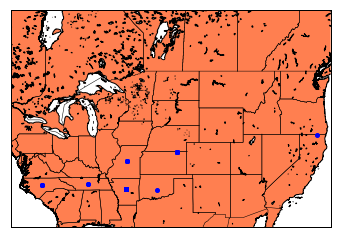

In [9]:
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'h', area_thresh = 0.1,
             llcrnrlon=-74, llcrnrlat=30,urcrnrlon=-125,urcrnrlat=55)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
map.drawstates()


lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
map.plot(x, y, 'bo', markersize=4)

plt.show()

OH NO WHAT'S WRONG?

# Exercise 2: Fix map orientation

Take a look at line 5 below. What do these weirdo keywords mean? See if you can have a look at the BaseMap documentation and see if you can fix it.

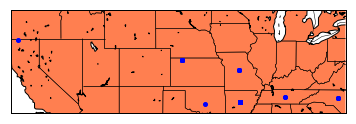

In [16]:
# Fix map orientation

map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh = 0.1,
             urcrnrlon=df.long.max() + 1, llcrnrlat=df.lat.min() - 1,llcrnrlon=df.long.min() - 1,urcrnrlat=df.lat.max() + 3)
#The problem is on the line immediately above. See if you can use the 
# documents to correct: https://matplotlib.org/basemap/api/basemap_api.html 

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
map.drawstates()


lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
map.plot(x, y, 'bo', markersize=4)

plt.show()

In [12]:
df.lat.min()

34.9550817

# Exercise 3: 

Use the [documentation](https://matplotlib.org/basemap/api/basemap_api.html) to add state lines to the map.

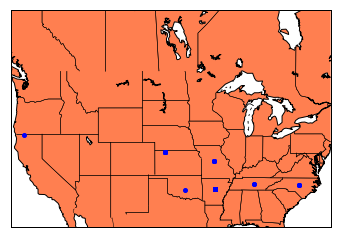

In [35]:
# Add State Lines
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh = 1000,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=55)
 
map.drawcoastlines()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
map.drawstates()

lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
map.plot(x, y, 'bo', markersize=4)

plt.show()

You may have noticed that it barely looks like we have any plots on this thing. Many of our observations were overlapping, because the person who recorded them was non-specific. Something we may want to do is set the alpha value of the point, which will make them see-through. That way, when they plot on top of one another, they will be darker, so we can see places with multiple observations.

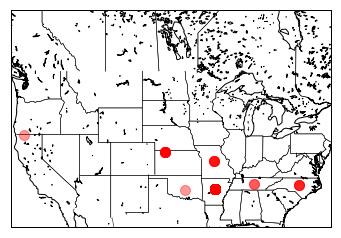

In [39]:
# Add State Lines
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh = 0.1,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=55)
 
map.drawcoastlines()
map.drawmapboundary()
map.drawstates()


lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
map.plot(x, y, 'ro', markersize=10, alpha=0.4)

#plt.show()

plt.savefig("alphaplot")

Another common visual is to scale the size of the points with how many observations there are. This is a bit tricker. Have a look at the code that was added below. Look at it solo, for a moment, then we will look at it together.

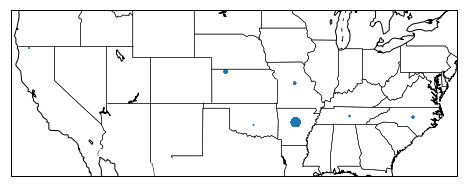

In [42]:
# Add State Lines
import collections

fig = plt.figure(figsize=(8, 8))
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh=500,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=45)
 
map.drawcoastlines()
map.drawmapboundary()
map.drawstates()


lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)


## Added Code
counts = collections.Counter(x)
count_dictionary = dict(counts)


sizes = []

for x1, y1 in zip(x, y):
    sizes.append(count_dictionary[x1])

    
map.scatter(x, y, 
          s=sizes)
#plt.show()
plt.savefig("plot")

# Exercise 4:

Have a look at the [documentation](https://matplotlib.org/basemap/api/basemap_api.html). How could we change over from black and white to a relief map?

In [ ]:
# Add relief
from collections import Counter
fig = plt.figure(figsize=(8, 8))
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh=500,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=45)
 
map.drawcoastlines(color='gray')
map.drawcountries(color='gray')
map.drawstates(color='gray')

lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
counts = collections.Counter(x)
count_dictionary = dict(counts)

sizes = []

for x1, y1 in zip(x, y):
    sizes.append(count_dictionary[x1])

    
map.scatter(x, y, cmap="red",
          s=sizes*20)
#plt.show()
plt.savefig("plot")

MemoryError: 

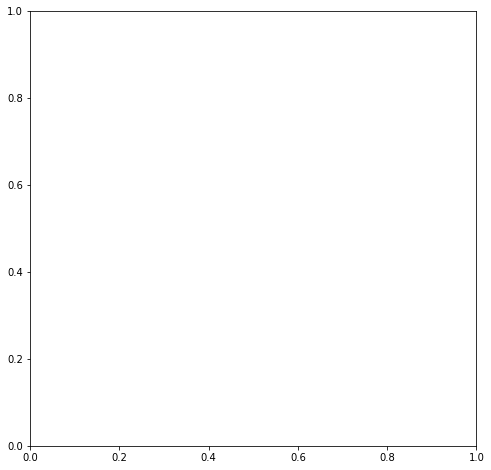

In [3]:
# Answer
from collections import Counter
fig = plt.figure(figsize=(8, 8))
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh=500,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=45)
 
map.shadedrelief()
map.drawcoastlines(color='gray')
map.drawcountries(color='gray')
map.drawstates(color='gray')

lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
counts = collections.Counter(x)
count_dictionary = dict(counts)

sizes = []

for x1, y1 in zip(x, y):
    sizes.append(count_dictionary[x1]*10)

    
map.scatter(x, y, 
          s=sizes, c=np.log10(sizes), cmap='Blues')
plt.show()


# Exercise 5:

There is a northern California population that is very hard to see. Try using either point size or color to make it more visible. You can pass in arguments as you would to [scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). Possible arguments of interest might be size, c, and cmap.

In [ ]:
# Make obviouser
from collections import Counter
fig = plt.figure(figsize=(8, 8))
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh=500,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=45)
 
map.shadedrelief()
map.drawcoastlines(color='gray')
map.drawcountries(color='gray')
map.drawstates(color='gray')

lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
counts = collections.Counter(x)
count_dictionary = dict(counts)

sizes = []

for x1, y1 in zip(x, y):
    sizes.append(count_dictionary[x1]*10)

    
map.scatter(x, y, 
          s=sizes, c=np.log10(sizes), cmap='Blues')
plt.show()


In [ ]:
# Possible Answer
from collections import Counter
fig = plt.figure(figsize=(8, 8))
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh=500,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=45)
 
map.shadedrelief()
map.drawcoastlines(color='gray')
map.drawcountries(color='gray')
map.drawstates(color='gray')

lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
counts = collections.Counter(x)
count_dictionary = dict(counts)

sizes = []

for x1, y1 in zip(x, y):
    sizes.append(count_dictionary[x1]*10)

    
map.scatter(x, y, 
          s=sizes, c=np.log10(sizes), cmap='Blues')
plt.show()


Let's try adding a legend so we can have some indication of how many specimens were found here.

In [ ]:
fig = plt.figure(figsize=(18, 12))
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh=500,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=45)
 
map.shadedrelief()
map.drawcoastlines(color='gray')
map.drawcountries(color='gray')
map.drawstates(color='gray')

lat_list = list(df['lat'])
long_list = list(df['long'])
x,y = map(long_list, lat_list)
counts = collections.Counter(x)
count_dictionary = dict(counts)

n_obs = []
sizes = []
for x1, y1 in zip(x, y):
    n_obs.append(count_dictionary[x1])
    sizes.append(float(count_dictionary[x1]*10))
map.scatter(x, y, 
          s=sizes, c=n_obs, cmap='Blues')

plt.colorbar(label=r'Number of Observations', fraction=0.0175, pad=0.04)
plt.show()

# Exercise 6

Fun time party exercise. Try experimenting with [cmaps](https://matplotlib.org/examples/color/colormaps_reference.html). Are you able to find something that makes that CA population a little more obvious? I kind of wasn't. When you get it, download the image, and upload it to [this](https://www.color-blindness.com/coblis-color-blindness-simulator/) colorblindness simulator. Is your image colorblind friendly? 

[Colorbrewer2](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) is a utility for assisting in making color blind-friendly figures.

In [ ]:
fig, ax = plt.subplots()
map = Basemap(projection='merc',lat_0 = 35, lon_0 = -75,
    resolution = 'l', area_thresh=500,
             llcrnrlon=-125, llcrnrlat=30,urcrnrlon=-74,urcrnrlat=45)
 
map.shadedrelief()
map.drawcoastlines(color='gray')
map.drawcountries(color='gray')
map.drawstates(color='gray')

lat_list = list(df['lat'])
long_list = list(df['long'])
names = list(df['acceptedScientificName'])
x,y = map(long_list, lat_list)
counts = collections.Counter(x)
count_dictionary = dict(counts)

n_obs = []
sizes = []

ax.scatter(x, y)

labs = zip(names, x, y)
lab_set = set(labs)

for lab in lab_set:
    ax.annotate(str(lab[0]), (lab[1],lab[2]), xytext=(5, 5), textcoords='offset points')


## Check - In: Road Map

- AMW: Concept map on the board
- AMW: Update schedule
- Everybody: [LONI Logins](https://allocations.loni.org/login_request.php)
- Everybody: Right now, go to the [class repo](https://github.com/wrightaprilm/CompBio2018). Click on "Issues". Write one or two things you understand really well. Write one or two things you understand really poorly.